In [1]:
%matplotlib inline
%pylab inline
import sympy as sym
import numpy as np
import numpy.polynomial.polynomial as n_poly
import numpy.polynomial.legendre as leg
from mpl_toolkits.mplot3d import Axes3D

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# EXERCISE 1 :  L2 projection

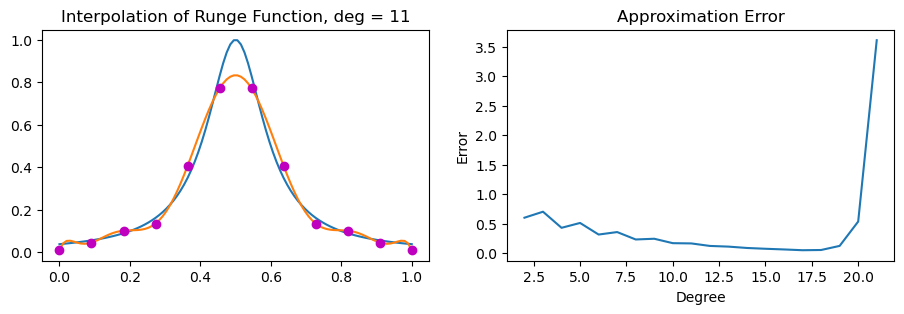

In [4]:
def basis(q):
    n = q.shape[0]
    L = [n_poly.Polynomial.fromroots([xj for xj in q if xj != q[i]]) for i in range(n)]
    L = [L[i]/L[i](q[i]) for i in range(n)]
    return L

def quadrature_rule(Nq):
    
    p,w = leg.leggauss(Nq)
    w = .5 * w
    p = .5*(p+1)
    W = np.diag(w)
    return p, W

def get_interpolating_function(LL, ui):
    def func(LL, ui, x):
        acc = 0
        for L, u in zip(LL, ui):
            # print(L, u)
            acc += u * L(x)
        return acc
    return lambda x: func(LL, ui, x)

def l2_projection(f, q, Nq):
    
    L = basis(q)
    p, W = quadrature_rule(Nq)
    
    B = np.zeros((0,Nq))
    for l in L:
        B = np.vstack([B,l(p)])
    M = B.dot(W.dot(B.T))
    p = p.reshape((p.shape[0],1))
    b = B.dot(W.dot(f(p)))
    
    u = np.linalg.solve(M, b)
    I = get_interpolating_function(L, u)
    
    return u, I

def main():
    t = sym.var('t')
    f = 1 / (1 + 100 * (t - 0.5)**2)
    Fd = f.diff(t, 1)
    
    f = sym.lambdify(t,f, 'numpy')
    F = sym.lambdify(t,Fd, 'numpy')
    
    deg = 11
    Nq = deg+1
    x = np.linspace(0,1,100)
    q = np.linspace(0,1,Nq)

    u,I = l2_projection(f, q, Nq)
    
    fig, axes = plt.subplots(1, 2, figsize=(11,3))

    axes[0].plot(x, f(x))
    axes[0].plot(x, I(x))
    axes[0].plot(q, u, 'mo')
    axes[0].set_title("Interpolation of Runge Function, deg = 11")

    degs = np.arange(2,22)
    errs = []
    for dg in degs:
        u,I = l2_projection(f, np.linspace(0,1,dg+1), dg+1)
        err = np.max(np.abs(f(x) - I(x)))
        errs.append(err)
    
    axes[1].plot(degs, errs)
    axes[1].set_xlabel('Degree')
    axes[1].set_ylabel('Error')
    axes[1].set_title('Approximation Error')

if __name__ == "__main__":
    main()

# EXERCISE 2 : Quadrature rules in 2D

Points0 Shape: (51,) Points Shape (Tensor): (2601, 2)
Weights0 Shape: (51,) Weights Shape (Tensor): (2601,)
Approximation: 0.10904835279324829


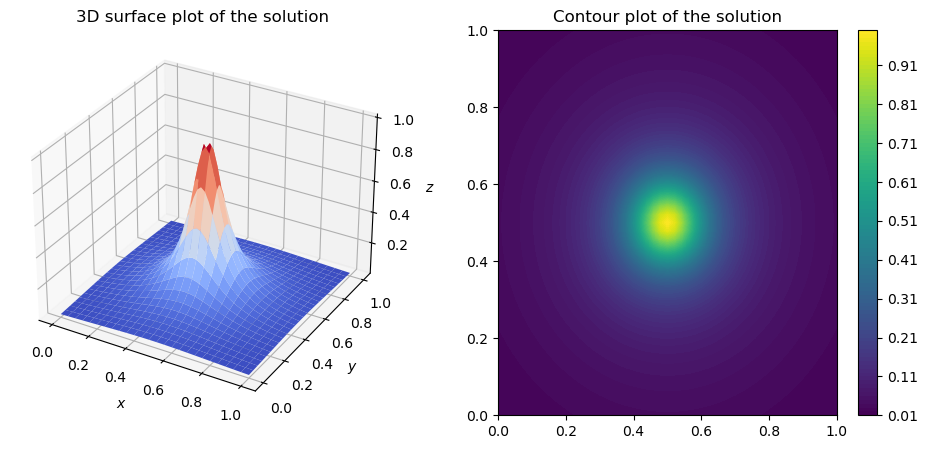

In [5]:
def quadrature_rule(Nq):
    p, w = leg.leggauss(Nq)

    weights = .5 * w
    points = .5 * (p + 1)
    
    return points, weights

def tensor_product_quadrature_rule(n):
    
    points1, weights1 = quadrature_rule(n)
    points2, weights2 = quadrature_rule(n)

    points = np.transpose([np.repeat(points1, n), np.tile(points2, n)])
    weights = np.outer(weights1, weights2).flatten()

    return points, weights

def main():
    deg = 50
    Nq = deg + 1
    points0, weights0 = quadrature_rule(Nq)
    points, weights = tensor_product_quadrature_rule(Nq)
    
    print("Points0 Shape:", points0.shape, "Points Shape (Tensor):", points.shape )
    print("Weights0 Shape:", weights0.shape, "Weights Shape (Tensor):", weights.shape )

    f = lambda x, y: 1/(1+100*((x-.5)**2+(y-.5)**2)) #RUNGE 2D
    
    integral = np.sum(weights * f(points[:, 0], points[:, 1]))

    print("Approximation:", integral)
    
    # Plot1 the 2D FUNCTION
    x, y = np.meshgrid(np.linspace(0, 1, Nq), np.linspace(0, 1, Nq))
    z = f(x, y)

    fig = plt.figure(figsize=(12, 5))

    # Plot1
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(x, y, z, cmap='coolwarm')
    ax1.set_xlabel('$x$')
    ax1.set_ylabel('$y$')
    ax1.set_zlabel('$z$')
    ax1.set_title('3D surface plot of the solution')

    # Plot2
    ax2 = fig.add_subplot(122)
    plt.contourf(x, y, z, levels=100)
    plt.colorbar()
    ax2.set_title('Contour plot of the solution')

    plt.show()


if __name__ == "__main__":
    main()